In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel, PseudoVoigtModel, LorentzianModel, VoigtModel, LinearModel
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import peakutils
from peakutils.plot import plot as pplot
import numpy as np
from pathlib import Path
import glob
from scipy.signal import find_peaks_cwt, find_peaks, savgol_filter

c:\Users\james\OneDrive - University of St Andrews\Research_Data\CuCrO2
c:\Users\james\OneDrive - University of St Andrews\Research_Data\CuCrO2\GM1-805\GM1-805\GM1-805_2DT2T_Ex2_exported.xy
Loading c:\Users\james\OneDrive - University of St Andrews\Research_Data\CuCrO2\GM1-805\GM1-805\GM1-805_2DT2T_Ex2_exported.xy


Text(0, 0.5, 'Intensity')

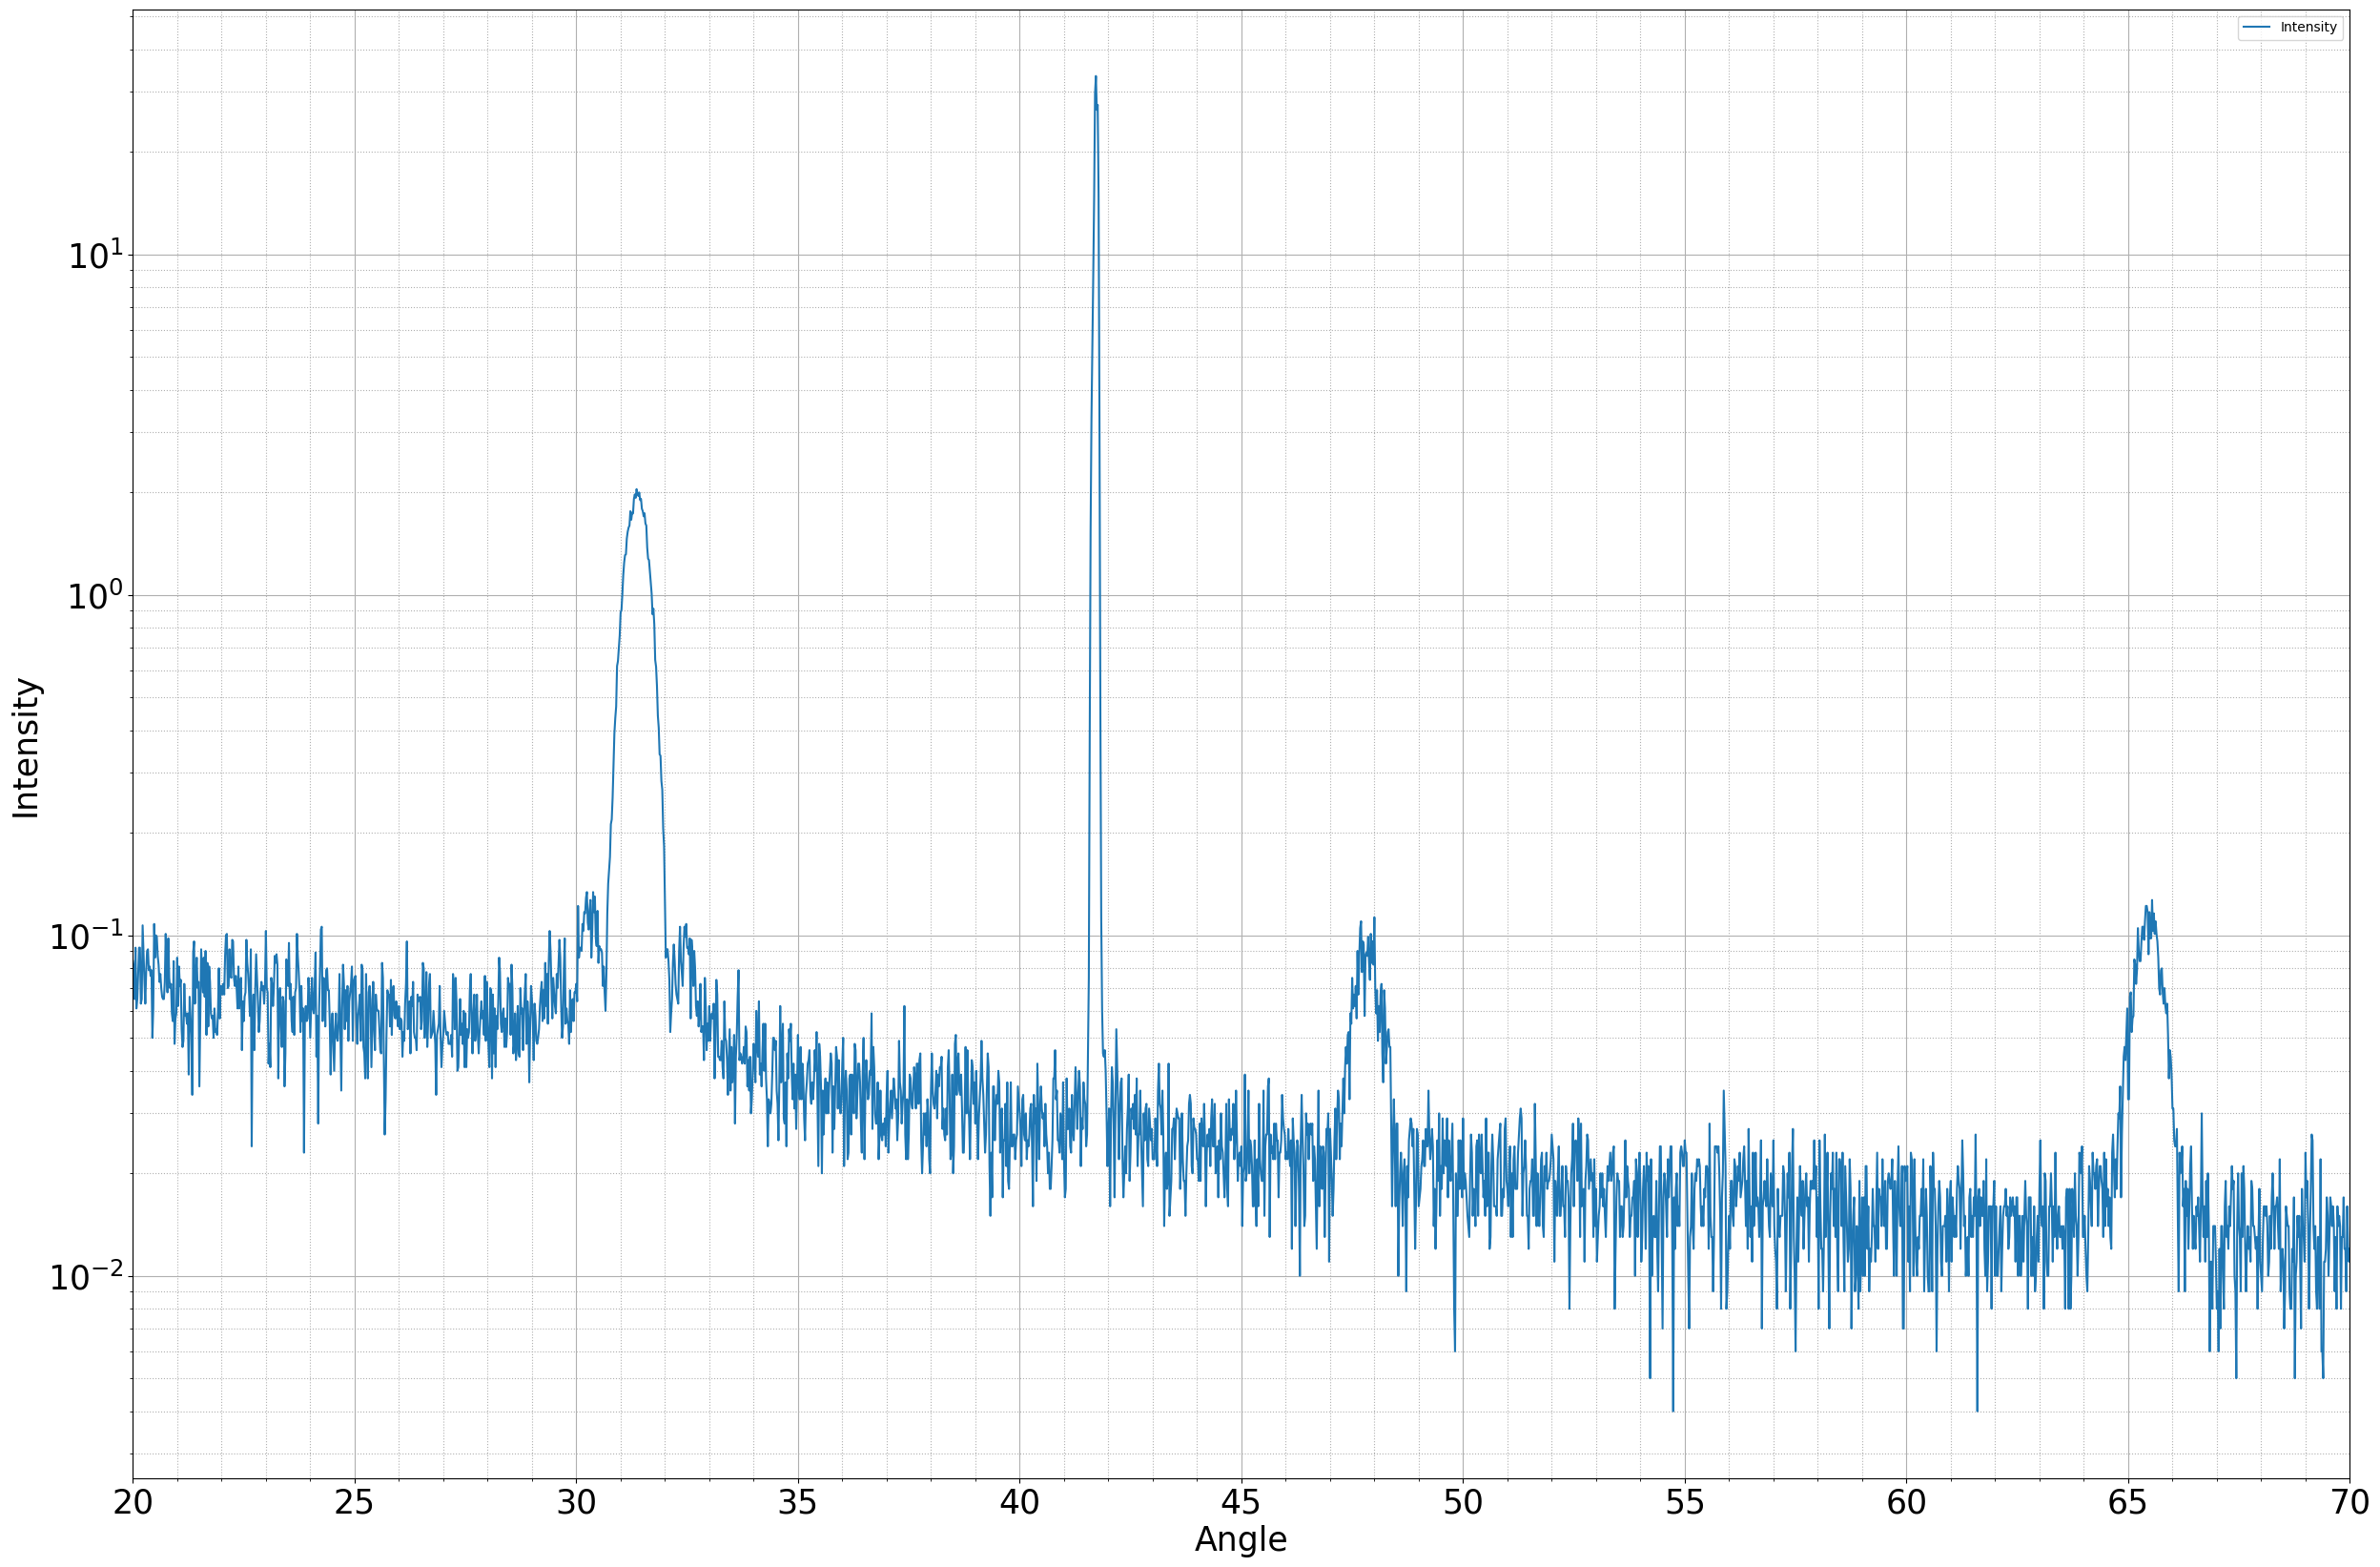

In [5]:
# Takes the drive path for folders two above working GM
# Searching through higher folder level will increase the time the program takes to find given file

path = str(Path.cwd())
print(path)

# Asks for the file name
# File name must be giving using with extension and only functions when loading xy, txt or csv files
# xy files can be directly exported from the Eva software for XRD

active = True
while active:
    file_name = str(input('Enter file name with extension (.xy, .txt or .csv'))
    if file_name.endswith('.txt'):
        data_file = glob.glob(path + '//**/*.txt', recursive=True)
        active = False
    elif file_name.endswith('.xy'):
        data_file = glob.glob(path + '//**/*.xy', recursive=True)
        active = False
    elif file_name.endswith('.csv'):
        data_file = glob.glob(path + '//**/*.csv', recursive=True)
        active = False
    else:
        print('ERROR: Invalid import. Try again')


# Loads the XRD if the data is saved as a csv, text or xy file. 
# X and y labels can be set as desired. At present once set these cannot be changed on the graph
# This would need to be altered in the future to allow for adjustments of graphs
# A predesigned, standard graph could be programmed in before running the program
# Identifies the given file 
for identity in data_file:
    if file_name in identity:
        print(identity)
        
        active_1 = True
        while active_1:
            name = identity
            if name.endswith('.txt'):
                data = pd.read_csv(name, sep = ' ', header = 0, keep_default_na=False)
                data = data.iloc[:, [0,1]]
                data.columns = [str(input('Enter x axis title')), str(input('Enter y axis title'))]
                print('Loading ' + name)
                active_1 = False
            elif name.endswith('.csv'):
                data = pd.read_csv(name, sep = ',', header = 0, keep_default_na = False)
                data = data.iloc[:, [0,1]]
                data.columns  = [str(input('Enter x axis title')), str(input('Enter y axis title'))]
                print('Loading ' + name)
                active_1 = False
            elif name.endswith('.xy'):
                data = pd.read_table(name, sep = ' ', header = 0, keep_default_na=False)
                data = data.iloc[:, [0,1]]
                data.columns = [str(input('Enter x axis title')), str(input('Enter y axis title'))]
                print('Loading ' + name)
                active_1 = False
            else:
                print('Error: Invalid response')



x_label = (list(data.columns))[0]  # obtains the x column name
y_label = (list(data.columns))[1] # obtains the y column name

# plots the full XRD scan 


fig1, ax1 = plt.subplots(figsize = (30, 20))  
data.plot(kind = 'line', x = str(x_label), ax = ax1, fontsize = 25, logy = True)
ax1.set_xlim(data.iloc[0][str(x_label)], data.iloc[-1][str(x_label)])
ax1.minorticks_on()
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.grid(which = 'major', linestyle = '-')
ax1.grid(which = 'minor', linestyle = ':')
ax1.set_xlabel(str(x_label), fontsize = 25)
ax1.set_ylabel(str(y_label), fontsize = 25)


In [6]:
class Fit:
    
    def __init__(self, x_data, y_data, background, pars):
        self.x_data = x_data
        self.y_data = y_data
        self.background = background
        self.pars = pars

    def Gauss(self):
        gauss = GaussianModel()
        par_gauss = self.pars + gauss.guess(self.y_data, x = self.x_data)
        mod_gauss = self.background + gauss
        out_gauss = mod_gauss.fit(self.y_data, par_gauss, x=self.x_data)
        return out_gauss

    def Lorentz(self):
        lorentz = LorentzianModel()
        par_lorentz = self.pars + lorentz.guess(self.y_data, x = self.x_data)
        mod_lorentz = self.background + lorentz
        out_lorentz = mod_lorentz.fit(self.y_data, par_lorentz, x=self.x_data)
        return out_lorentz

    def Voigt(self):
        voigt = VoigtModel()
        par_voigt = self.pars + voigt.guess(self.y_data, x = self.x_data)
        mod_voigt = self.background + voigt
        out_voigt = mod_voigt.fit(self.y_data, par_voigt, x = self.x_data)
        return out_voigt

    def Pseudo(self):
        pseudo = PseudoVoigtModel()
        par_pseudo = self.pars + pseudo.guess(self.y_data, x = self.x_data)
        mod_pseudo = self.background + pseudo
        out_pseudo = mod_pseudo.fit(self.y_data, par_pseudo, x=self.x_data)
        return out_pseudo
        

In [7]:
# Function to graph given input data 
# a = x_label, b = y_label, c = peak_lower_limit, d = peak_upper_limit, e = line of best fit, f = x axis data

def graph(x_label, y_label, peak_lower_limit, peak_upper_limit, line_of_best_fit, x_axis_data):         
    fig, ax = plt.subplots(figsize = (16, 12))
    data.plot(kind = 'scatter', x = x_label, y = y_label, ax = ax, logy = True, fontsize = 25)
    ax.set_xlim(peak_lower_limit, peak_upper_limit)
    ax.set_xlabel(x_label, fontsize = 25)
    ax.set_ylabel(y_label, fontsize = 25)
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = '-')
    ax.grid(which = 'minor', linestyle = ':')
    ax.plot(x_axis_data, line_of_best_fit, color  = 'red')
    

def fit_best(best_result, lower_peak, upper_peak, x):
    if best_result.Gauss().redchi < (best_result.Lorentz().redchi and best_result.Pseudo().redchi and best_result.Voigt().redchi):
        print(best_result.Gauss().fit_report())
        graph(x_label, y_label, lower_peak, upper_peak, best_result.Gauss().best_fit, x)
    elif best_result.Lorentz().redchi < (best_result.Pseudo().redchi and best_result.Voigt().redchi):
        print(best_result.Lorentz().fit_report())
        graph(x_label, y_label, lower_peak, upper_peak, best_result.Lorentz().best_fit, x)
    elif best_result.Pseudo().redchi < best_result.Voigt().redchi:
        print(best_result.Pseudo().fit_report())
        graph(x_label, y_label, lower_peak, upper_peak, best_result.Pseudo().best_fit, x)
        print(best_result.Pseudo().params['height'].value)
    else:
        print(best_result.Voigt().fit_report())
        graph(x_label, y_label, lower_peak, upper_peak, best_result.Voigt().best_fit, x)
        print(best_result.Voigt().params['height'].value)

a = True
while a:
    substrate = str(input('Enter substrate'))
    if substrate == 'Al2O3' or 'Aluminium oxide' or 'aluminium oxide' or 'al2o3':
        print('Substrate: Aluminium oxide')
        a = False
    else:
        print('Error: Please enter valid response')
        
al2o3_peak_lower = 41.3  # must be lower than the center position of the substrate peak
al2o3_peak_upper = 42.3  # must be higher that the center position of the substrate peak.  

al2o3_lower = data[data[str(x_label)] == (float(al2o3_peak_lower))].index # Extracts the user input data only for x values from total data
al2o3_upper  = data[data[str(x_label)] == (float(al2o3_peak_upper))].index
al2o3_peak = data.iloc[al2o3_lower[0]:al2o3_upper[0]]  # extracts the y data for substrate x values
al2o3_x = al2o3_peak[str(x_label)].values  # creates x and y values used for fitting line of best fit 
al2o3_y = al2o3_peak[str(y_label)].values
#print(al2o3_x)
#print(al2o3_y)
# determines the best fit (red Chi squared) for the substrate peak + background.  

background = LinearModel()
pars = background.make_params(intercept = al2o3_y.min(), slope = 0)
substrate_fit = Fit(al2o3_x, al2o3_y, background, pars)  # The fit background might need to be changed

# the type of fit (e.g. Gaussian, Lorentz etc.) may need to be changed due to the 'sharpness' of the substrates peak 
#fit_best(substrate_fit, al2o3_peak_lower, al2o3_peak_upper, al2o3_x)

Substrate: Aluminium oxide


[[Model]]
    (Model(linear) + Model(gaussian))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 150
    # variables        = 5
    chi-square         = 0.25788735
    reduced chi-square = 0.00177853
    Akaike info crit   = -944.880157
    Bayesian info crit = -929.826981
    R-squared          = 0.99573205
[[Variables]]
    slope:     -0.01016444 +/- 0.00414317 (40.76%) (init = 0)
    intercept:  0.39195280 +/- 0.13100651 (33.42%) (init = 0.016)
    amplitude:  1.29699608 +/- 0.00997191 (0.77%) (init = 1.86186)
    center:     31.3708971 +/- 0.00176966 (0.01%) (init = 31.37)
    sigma:      0.26951961 +/- 0.00196605 (0.73%) (init = 0.31)
    fwhm:       0.63467017 +/- 0.00462970 (0.73%) == '2.3548200*sigma'
    height:     1.91981059 +/- 0.01111247 (0.58%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept)     = -0.9993
    C(amplitude, sigma)     = +0.7027
 

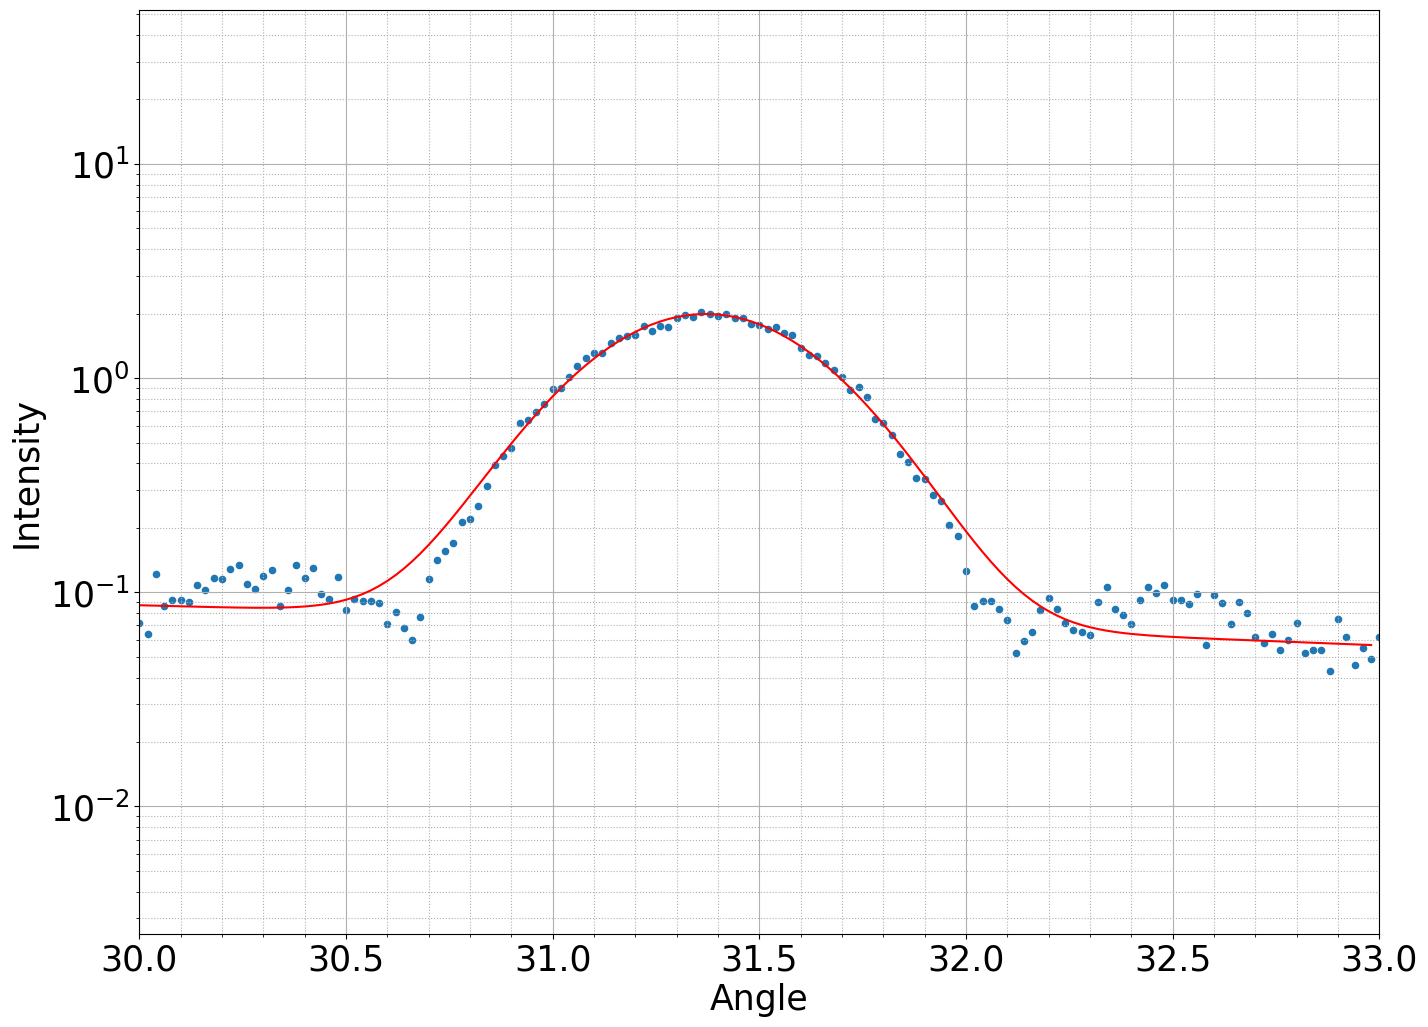

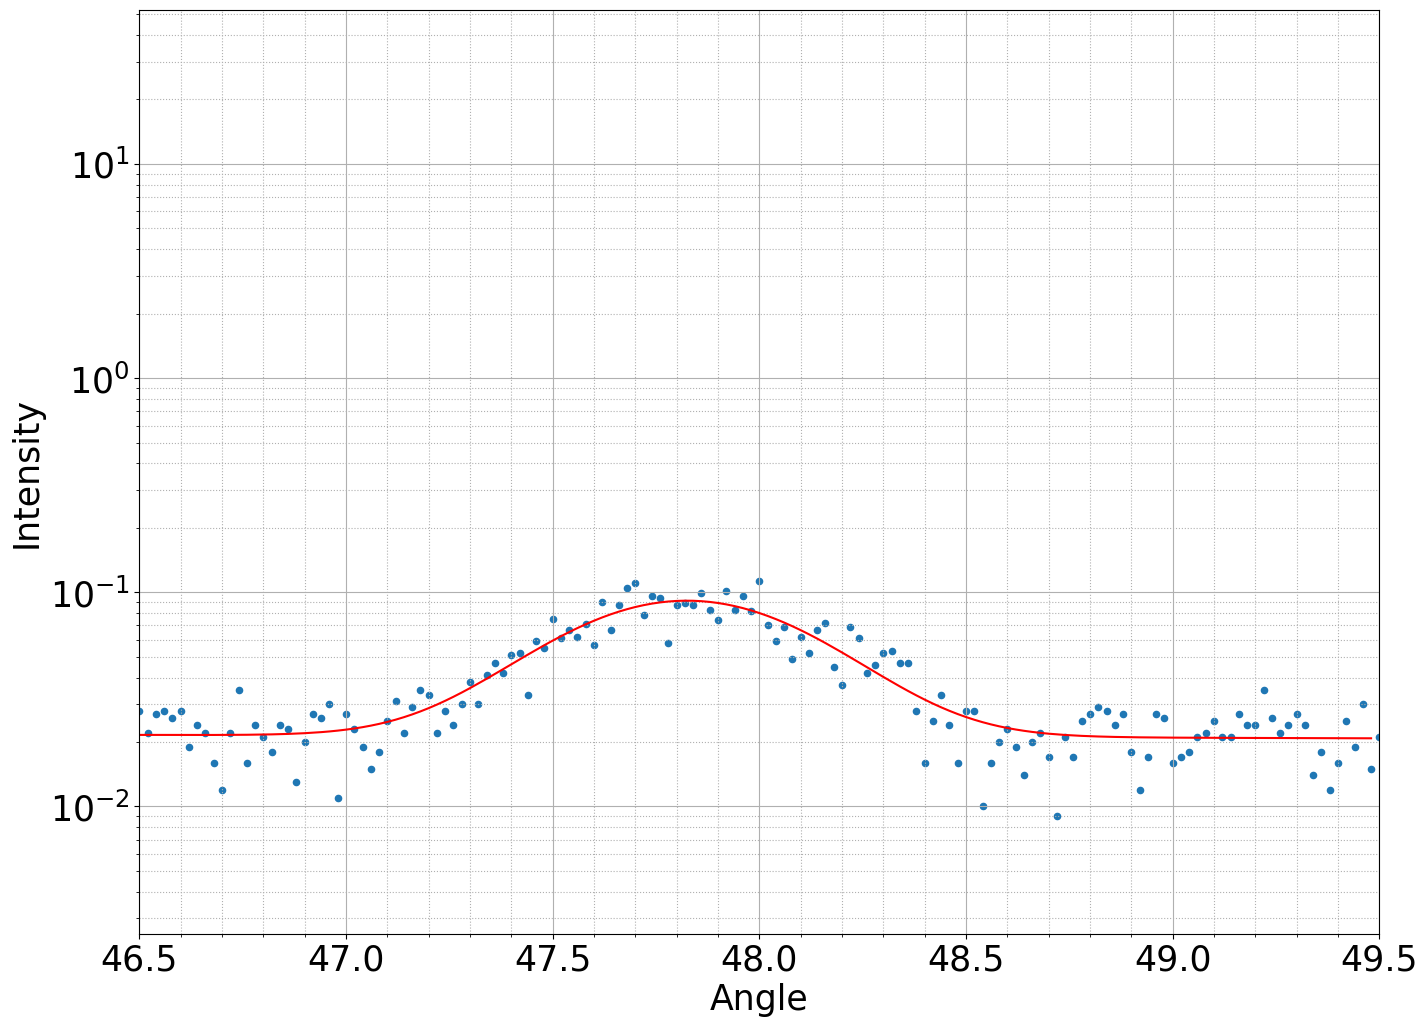

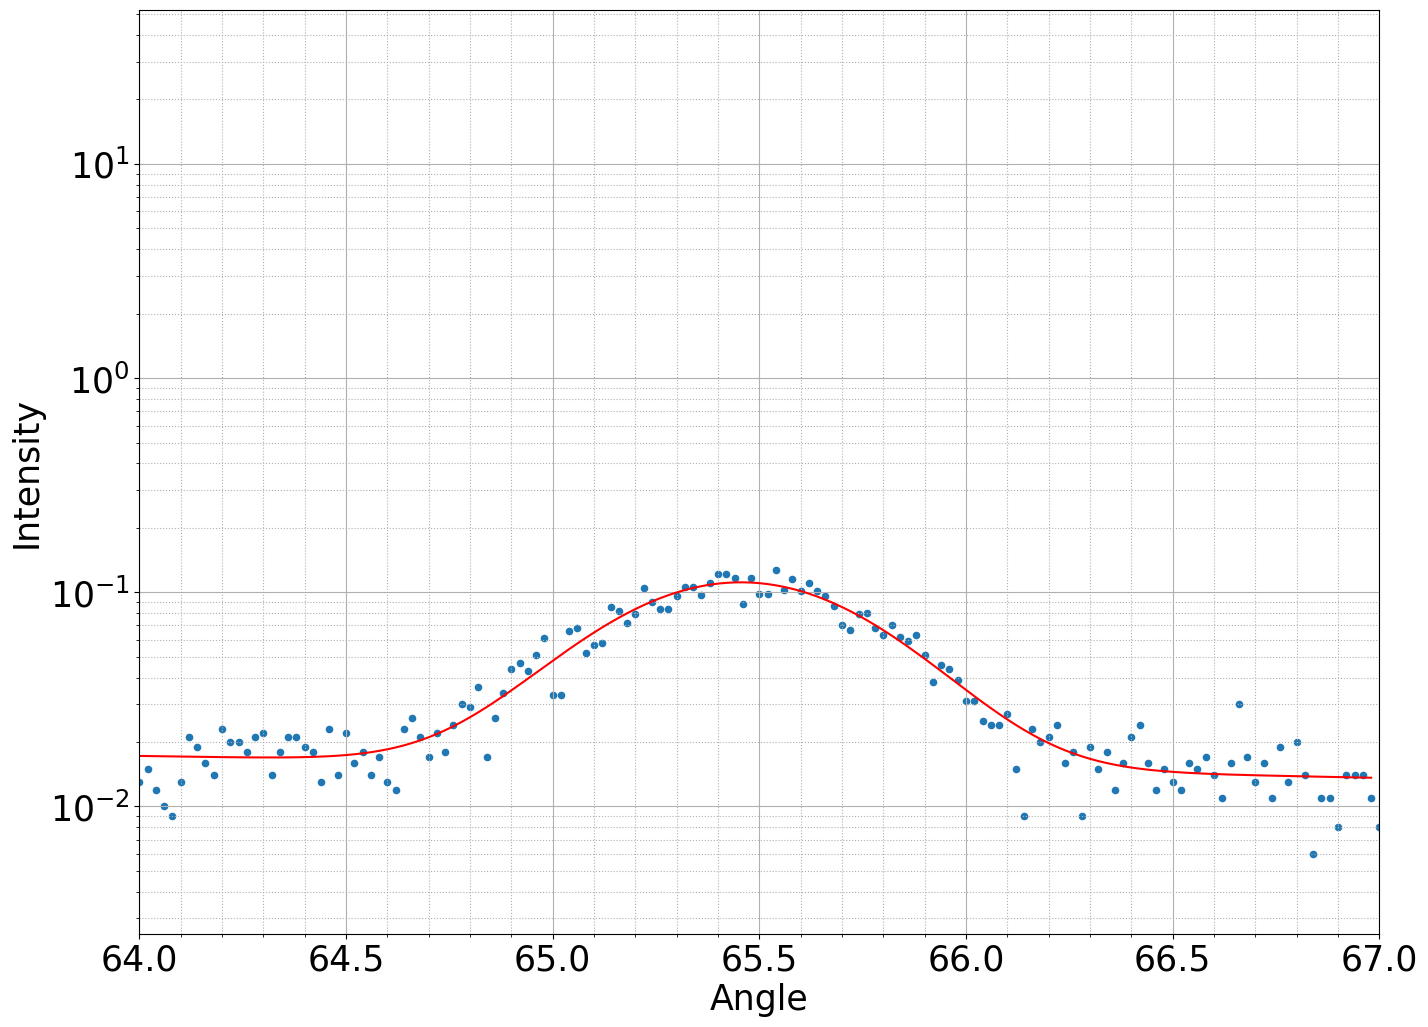

In [8]:
# Asks for the number of peaks that need to be fitted


number_of_peaks = int(input('Enter number of peaks'))
peaks = {}

# Asks for the rough positions of the peaks that need to be fitted
# Adds/subtracts 1.5 to each rough guess of position

for i in range(number_of_peaks):
    peak_guess = float(input('Enter peak guess'))
    peaks['peak_'+ str(i)] = [peak_guess]    # Assigns each peak guess to a seperate variable, peak_0, peak_1 etc. 
    lower_peak = peak_guess - 1.5
    upper_peak = peak_guess + 1.5
    lower_index = data[data[str(x_label)] == float(lower_peak)].index
    upper_index = data[data[str(x_label)] == float(upper_peak)].index
    peaks['peak_'+ str(i)].append(lower_peak)
    peaks['peak_'+ str(i)].append(upper_peak)
    peaks['peak_'+ str(i)].append(lower_index[0])
    peaks['peak_'+ str(i)].append(upper_index[0])
    
df = pd.DataFrame.from_dict(peaks, orient= 'index', columns = ['Position', 'Lower limit', 'Upper limit', 'Lower index', 'Upper index'])  # Creates datafrme containg the input numbers including the upper and lower indexs

# Upper and lower index are used to get the specific x and y data for the plotting  

# Determines the x and y data for the upper and lower indexes within the data file.
 
lower_y = []
upper_y = []
for i in df.index:
    #print(data.iloc[df['Lower index'][i]][str(y_label)])
    #print(data.iloc[df['Upper index'][i]][str(y_label)])
    lower_y.append(data.iloc[df['Lower index'][i]][str(y_label)])
    upper_y.append(data.iloc[df['Upper index'][i]][str(y_label)])

# Obtains the x data, y data, upper and lower x positions and fits each peak and determines the best fit using the reduced Chi critreon
# Plots the best fit result for each submitted peak. 

for i in df.index:
    lower_peak_index  = df['Lower index'][i]
    upper_peak_index = df['Upper index'][i]
    #print(lower_peak_index)
    lower_peak_position = data.iloc[lower_peak_index][str(x_label)]
    upper_peak_position = data.iloc[upper_peak_index][str(x_label)]
    x_data = data.iloc[lower_peak_index:upper_peak_index][str(x_label)].values
    y_data = data.iloc[lower_peak_index:upper_peak_index][str(y_label)].values
    final_result = Fit(x_data, y_data, background, pars)
    fit_best(final_result, lower_peak_position, upper_peak_position, x_data)


    
    

      Angle  Intensity
45    20.90      0.056
569   31.38      1.986
1087  41.74     26.592
1392  47.84      0.087
1795  55.90      0.027
2272  65.44      0.117


Text(0, 0.5, 'Intensity')

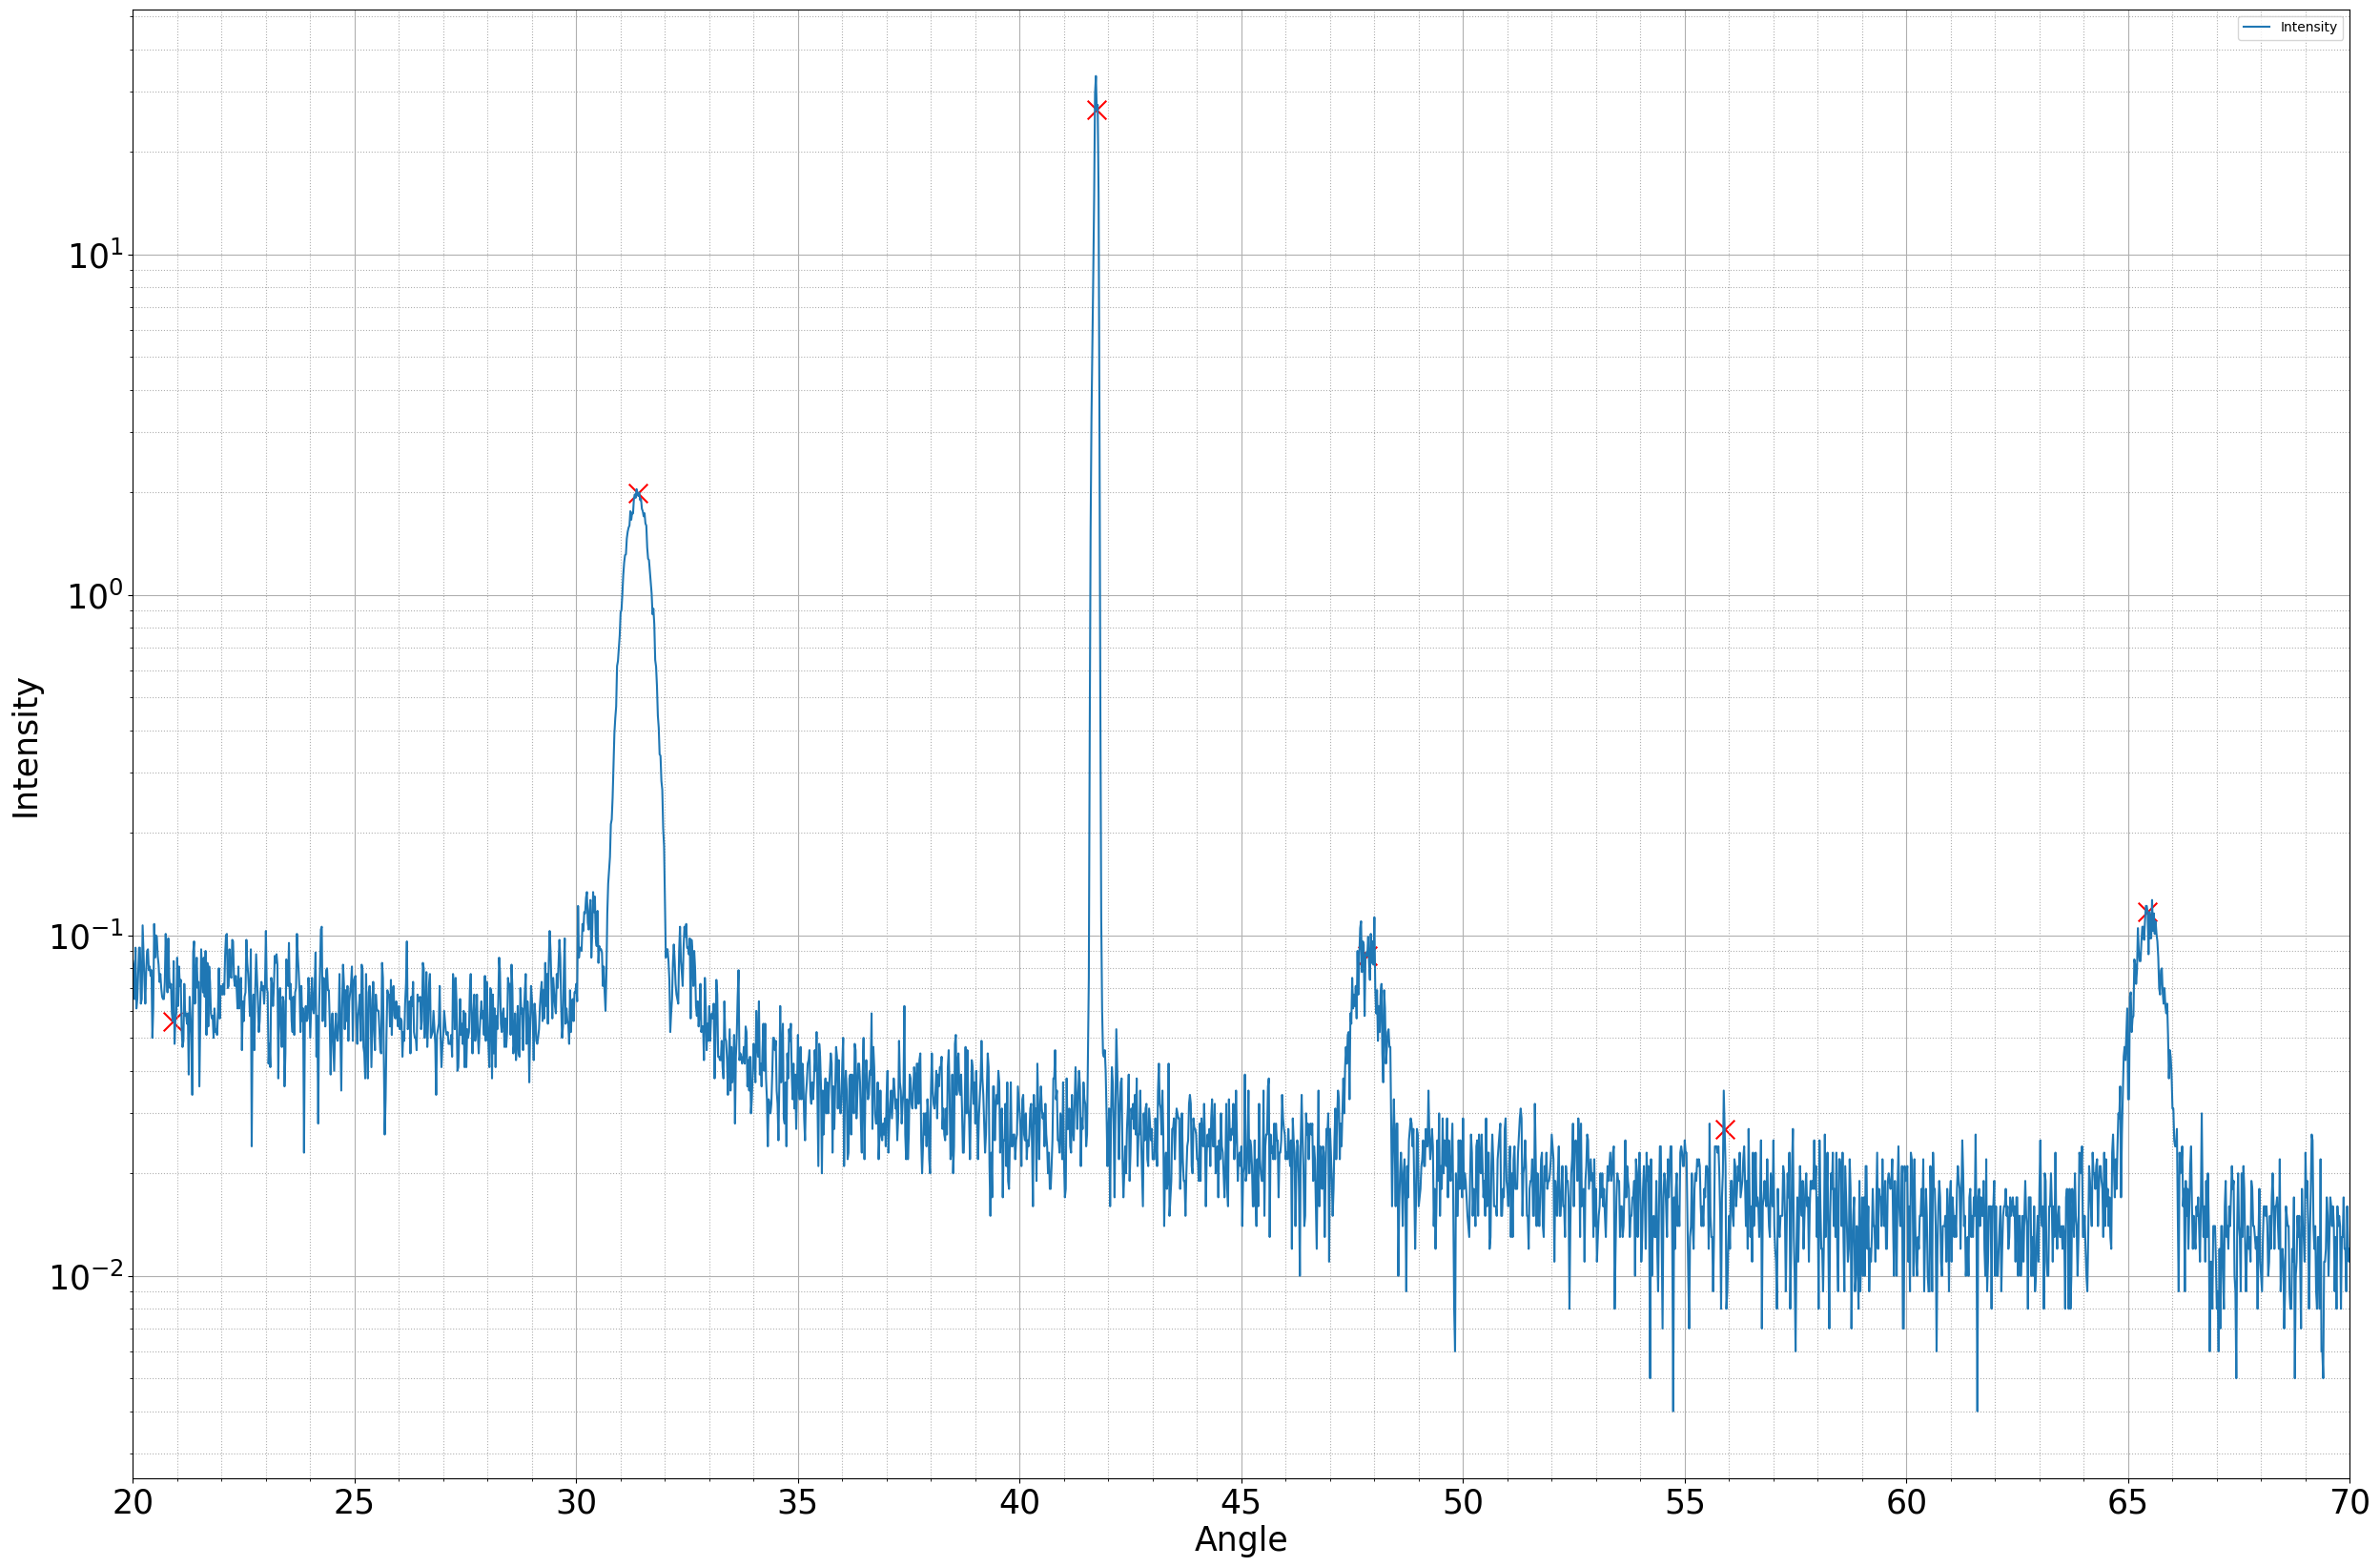

In [9]:
peaks_index = find_peaks_cwt(data['Intensity'], widths = 50)

peaks_dataframe = data.loc[peaks_index]
print(peaks_dataframe)

fig1, ax1 = plt.subplots(figsize = (30, 20))  
data.plot(kind = 'line', x = str(x_label), ax = ax1, fontsize = 25, logy = True)
peaks_dataframe.plot(kind = 'scatter', x = 'Angle', y = 'Intensity', ax=ax1, logy = True, c='Red',s = 200, marker='x')
ax1.set_xlim(data.iloc[0][str(x_label)], data.iloc[-1][str(x_label)])
ax1.minorticks_on()
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.grid(which = 'major', linestyle = '-')
ax1.grid(which = 'minor', linestyle = ':')
ax1.set_xlabel(str(x_label), fontsize = 25)
ax1.set_ylabel(str(y_label), fontsize = 25)

In [128]:
# trying peakutils to find the peaks within the XRD data
# manual adjustment of the threshold and minimum distance is required to determine the exact conditions
# for the finding significant peaks within the noise of the XRD scan

peak_indexes = peakutils.indexes(data['Intensity'], thres=0.0032, min_dist=75)
print(peak_indexes)
#print(data.loc[peak_indexes])
peak_frame = pd.DataFrame(data.loc[peak_indexes])
peak_frame.head()

# establishing a baseline to given data
# Unsure how to apply a 1/x for the baseline
# Current baseline subtration is linear

base = peakutils.baseline(data['Intensity'], 1)

# plotting of data with the peakutils peaks found

fig = plt.figure(figsize=(10,6))
plt.scatter(peak_frame['Angle'], peak_frame['Intensity'], marker='x')
plt.scatter(data['Angle'], data['Intensity'], marker = '.', c='gray', s=1)
plt.yscale('log')

plt.figure(figsize=(10,6))
plt.plot(data['Angle'], data['Intensity']-base)
plt.yscale('log')

[ 568 1086 1400 2277]


KeyError: 0

c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
c:\Users\james\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


<AxesSubplot:xlabel='Angle'>

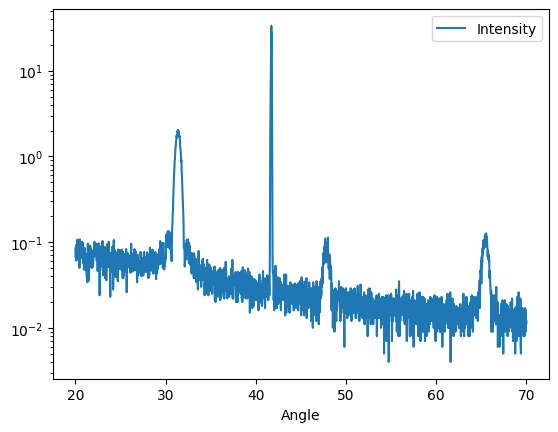

In [129]:
filtered_result = savgol_filter(data, window_length=len(data['Intensity']), mode = 'interp', polyorder=50, axis = 0)

filtered_result = pd.DataFrame(filtered_result)
filtered_result.columns = ['Angle', 'Intensity']
filtered_result.head()

data.plot(kind = 'line', x = 'Angle', y = 'Intensity', logy=True)
